<a href="https://colab.research.google.com/github/tienvtt/Stock-Analysis-and-Prediction-Applying-Machine-Learning/blob/master/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**:
- Use mathematical and statistical techniques and to analyze patterns, trends
- Utilize machine learning algorithm to predict stock price.
- Compare stocks belonged to Financial Services: SSI, VND, VCI, VIX, HCM for data-driven decisions.

# **Install library and load data**

In [3]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

Cloning into 'vnquant'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 431 (delta 23), reused 22 (delta 22), pack-reused 392 (from 1)
Receiving objects: 100% (431/431), 1.06 MiB | 6.33 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/vnquant
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setu

In [4]:
import pandas as pd
import vnquant.data as vnq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define stock symbols
symbols = ["SHB", "VHM", "FPT", "HPG","HCM"]

# Store DataFrames for each stock
stock_data = {}

for symbol in symbols:
    loader = vnq.DataLoader(
        symbols=symbol,
        start="2023-01-01",
        end="2025-03-21",
        minimal=True,
        data_source="cafe"
    )

    # Download and store DataFrame
    df = pd.DataFrame(loader.download())

    df.columns = df.columns.droplevel(level=1)

    stock_data[symbol] = df

    # Print first few rows for verification
    print(f"Data for {symbol}:")
    print(df.head(), "\n")


# Assign DataFrames to individual variables
df_shb = stock_data["SHB"]
df_vhm = stock_data["VHM"]
df_fpt = stock_data["FPT"]
df_hpg = stock_data["HPG"]
df_hcm = stock_data["HCM"]

[2025-03-26 03:55:33] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['SHB'] from CAFEF, start: 01/01/2023, end: 21/03/2025!
[2025-03-26 03:55:35] - Assitant - INFO      - download_one - line 94 - data SHB from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:55:35] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['VHM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for SHB:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  SHB  12.45  12.25  12.40  12.30   12.30    12036300.0   
2025-03-21  SHB  12.05  11.65  11.85  11.75   11.75    74606600.0   
2025-03-20  SHB  11.90  11.50  11.65  11.75   11.75    79891400.0   
2025-03-19  SHB  11.80  11.40  11.50  11.65   11.65    68781700.0   
2025-03-18  SHB  11.70  11.10  11.25  11.60   11.60    71982900.0   

Attributes   value_match  
date                      
2025-03-26  1.486960e+11  
2025-03-21  8.834230e+11  
2025-03-20  9.347830e+11  
2025-03-19  8.011410e+11  
2025-03-18  8.175310e+11   



[2025-03-26 03:55:37] - Assitant - INFO      - download_one - line 94 - data VHM from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:55:37] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['FPT'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for VHM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  VHM  52.20  50.50  51.80  50.80   50.80     2642900.0   
2025-03-21  VHM  48.40  47.10  47.10  48.25   48.25    13695700.0   
2025-03-20  VHM  48.20  46.95  47.35  47.35   47.35    13458400.0   
2025-03-19  VHM  47.90  46.25  46.80  47.35   47.35    13442500.0   
2025-03-18  VHM  48.75  46.80  47.60  47.30   47.30    12239500.0   

Attributes   value_match  
date                      
2025-03-26  1.361600e+11  
2025-03-21  6.590010e+11  
2025-03-20  6.384460e+11  
2025-03-19  6.318710e+11  
2025-03-18  5.820090e+11   



[2025-03-26 03:55:39] - Assitant - INFO      - download_one - line 94 - data FPT from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:55:39] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HPG'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for FPT:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  FPT  126.5  124.1  126.5  124.2   124.2     3285400.0   
2025-03-21  FPT  129.0  125.0  125.0  128.0   128.0     6424800.0   
2025-03-20  FPT  126.8  124.5  124.6  125.0   125.0     8203400.0   
2025-03-19  FPT  130.6  123.5  130.1  124.6   124.6    18128400.0   
2025-03-18  FPT  132.2  130.0  130.1  130.0   130.0     5508500.0   

Attributes   value_match  
date                      
2025-03-26  4.110380e+11  
2025-03-21  8.202040e+11  
2025-03-20  1.027201e+12  
2025-03-19  2.288715e+12  
2025-03-18  7.197290e+11   



[2025-03-26 03:55:41] - Assitant - INFO      - download_one - line 94 - data HPG from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-26 03:55:41] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HCM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for HPG:
Attributes code   high    low  open  close  adjust  volume_match   value_match
date                                                                          
2025-03-26  HPG  27.35  27.15  27.2  27.25   27.25     5830500.0  1.590800e+11
2025-03-21  HPG  27.25  27.05  27.1  27.15   27.15    18912200.0  5.135380e+11
2025-03-20  HPG  27.45  27.05  27.3  27.15   27.15    25022500.0  6.794540e+11
2025-03-19  HPG  27.60  27.10  27.6  27.25   27.25    37925600.0  1.036355e+12
2025-03-18  HPG  28.05  27.60  27.9  27.60   27.60    18741700.0  5.209910e+11 



[2025-03-26 03:55:43] - Assitant - INFO      - download_one - line 94 - data HCM from 2023-01-01 to 2025-03-21 have already cloned!


Data for HCM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-26  HCM  32.00  31.70  31.80  31.70   31.70     2500200.0   
2025-03-21  HCM  32.15  31.85  32.00  31.85   31.85     7561400.0   
2025-03-20  HCM  32.45  31.70  32.00  32.05   32.05     7952100.0   
2025-03-19  HCM  32.00  31.35  31.65  31.95   31.95    10722700.0   
2025-03-18  HCM  32.40  31.75  32.35  31.75   31.75     8207900.0   

Attributes   value_match  
date                      
2025-03-26  7.956100e+10  
2025-03-21  2.416840e+11  
2025-03-20  2.546920e+11  
2025-03-19  3.398620e+11  
2025-03-18  2.629520e+11   



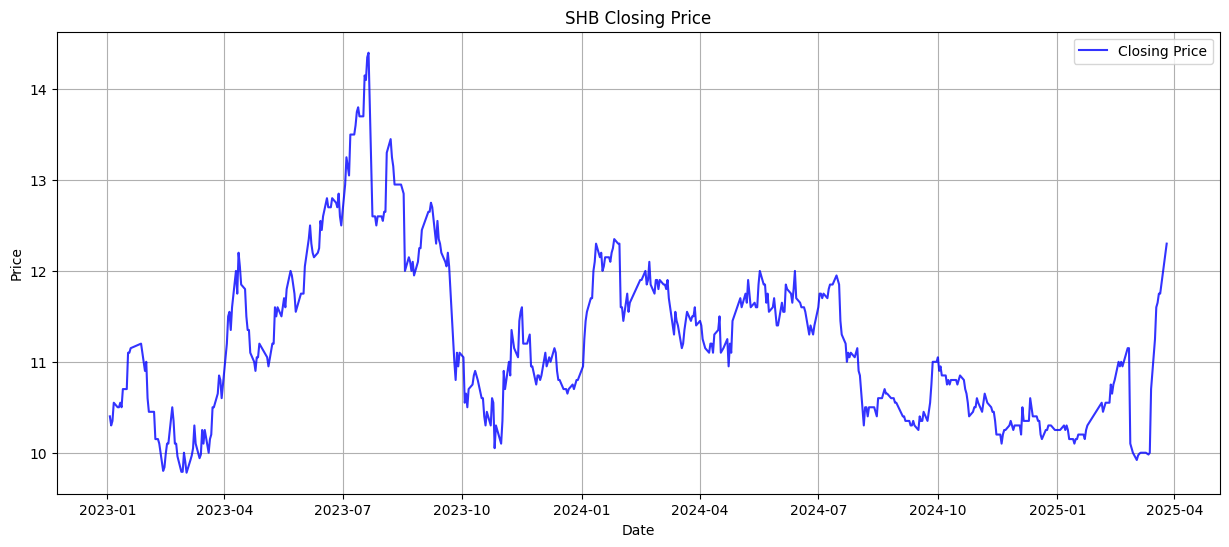

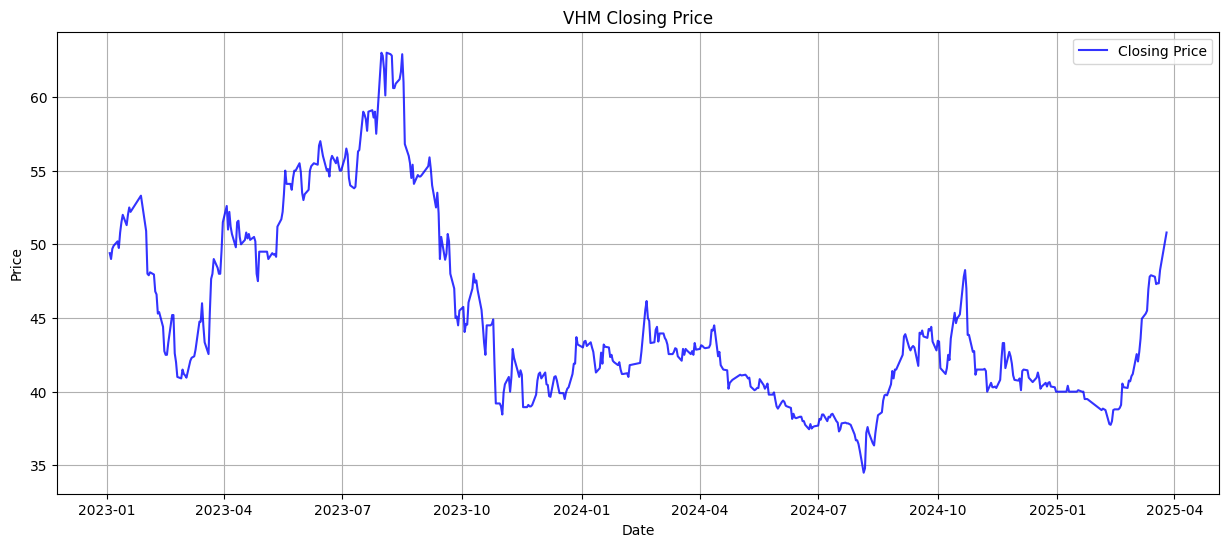

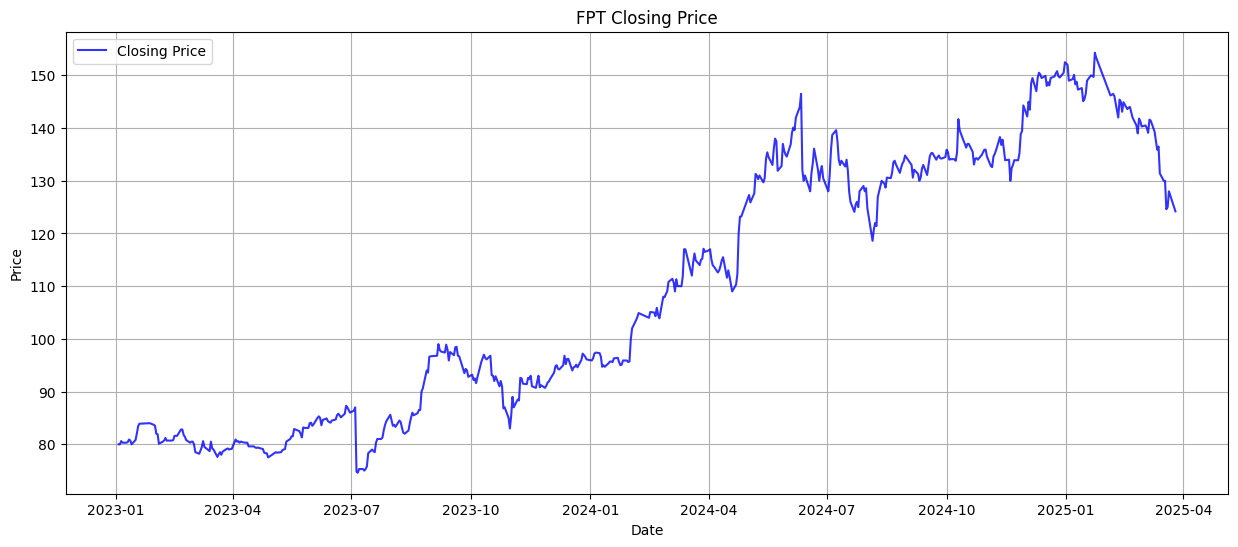

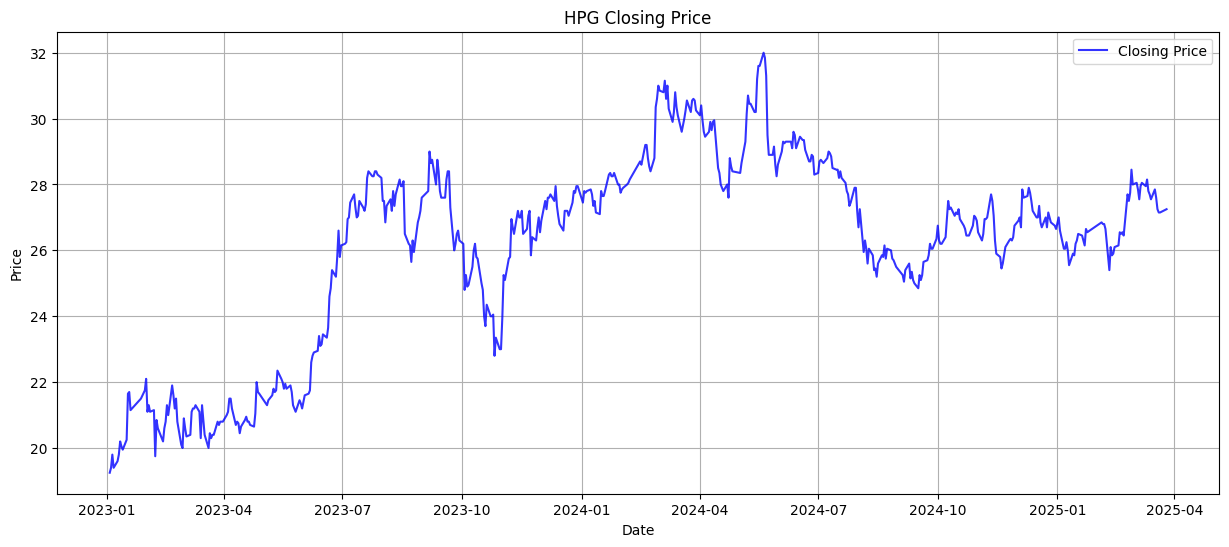

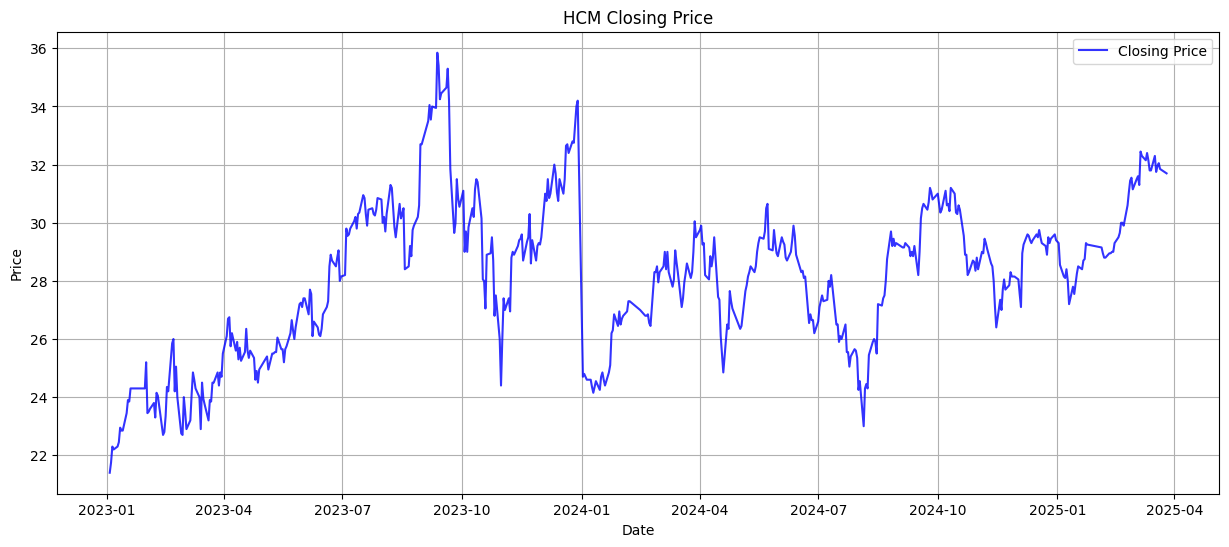

In [6]:
def plot_price_trend(df, symbol):
    """Plot Closing Price & SMA from a given start date."""
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df["close"], label="Closing Price", color="blue", alpha=0.8)
    plt.title(f"{symbol} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
plot_price_trend(df_shb,"SHB")
plot_price_trend(df_vhm,"VHM")
plot_price_trend(df_fpt,"FPT")
plot_price_trend(df_hpg,"HPG")
plot_price_trend(df_hcm,"HCM")


In [7]:
def stock_info(df):
  print (df.info())
  print (df.isnull().sum())

stock_info(df_shb)
stock_info(df_vhm)
stock_info(df_fpt)
stock_info(df_hpg)
stock_info(df_hcm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2025-03-26 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          551 non-null    object 
 1   high          551 non-null    float64
 2   low           551 non-null    float64
 3   open          551 non-null    float64
 4   close         551 non-null    float64
 5   adjust        551 non-null    float64
 6   volume_match  551 non-null    float64
 7   value_match   551 non-null    float64
dtypes: float64(7), object(1)
memory usage: 38.7+ KB
None
Attributes
code            0
high            0
low             0
open            0
close           0
adjust          0
volume_match    0
value_match     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2025-03-26 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code   

# **PREPARE FOR TRAINING GRU MODEL**





In [8]:
df_shb = df_shb.sort_index()
df_vhm = df_vhm.sort_index()
df_fpt = df_fpt.sort_index()
df_hpg = df_hpg.sort_index()
df_hcm = df_hcm.sort_index()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
def prepare_data(df, sequence_length=10):
    df = df[['close']].copy()  # Chỉ lấy cột "close"
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df)

    X, y = [], []
    for i in range(len(df_scaled) - sequence_length):
        X.append(df_scaled[i : i + sequence_length])
        y.append(df_scaled[i + sequence_length])

    X, y = np.array(X), np.array(y)

    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    return X_train, y_train, X_test, y_test, scaler
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # Chỉ lấy giá trị cuối cùng của chuỗi
        return out


def train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, num_layers, epochs, lr):
    model = GRUModel(input_size, hidden_size, num_layers)
    model.train()

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).numpy()

    return model, y_pred


def evaluate_model(y_test, y_pred, scaler):
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    mse = mean_squared_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_actual, y_pred_actual)

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual, label="Actual")
    plt.plot(y_pred_actual, label="Predicted", linestyle="dashed")
    plt.legend()
    plt.show()


def forecast_next_days(model, last_sequence, scaler, days=7):
    last_sequence = torch.tensor(np.expand_dims(last_sequence, axis=0), dtype=torch.float32)
    predictions = []

    model.eval()
    with torch.no_grad():
        for _ in range(days):
            next_pred = model(last_sequence).numpy()
            predictions.append(next_pred[0, 0])

            new_seq = np.roll(last_sequence.numpy(), -1, axis=1)
            new_seq[:, -1, 0] = next_pred[0, 0]
            last_sequence = torch.tensor(new_seq, dtype=torch.float32)

    predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    print("Dự đoán 7 ngày tiếp theo:", predictions_actual.flatten())


Epoch [10/50], Loss: 0.039698
Epoch [20/50], Loss: 0.024656
Epoch [30/50], Loss: 0.018729
Epoch [40/50], Loss: 0.012466
Epoch [50/50], Loss: 0.005940
MAE: 0.3204
MSE: 0.1558
RMSE: 0.3948
R2 Score: 0.0828


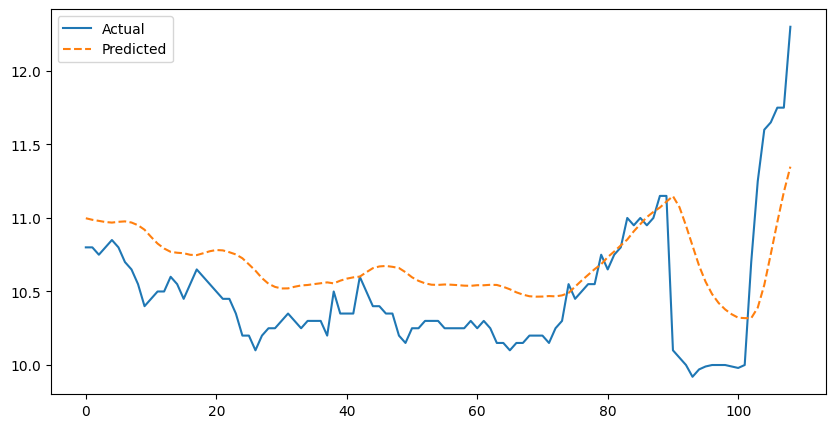

Dự đoán 7 ngày tiếp theo: [11.348615 11.442355 11.498273 11.536763 11.566917 11.583942 11.593755]


In [16]:
hyperparams = {
    "hidden_size": 64,
    "num_layers": 2,
    "epochs": 50,
    "lr": 0.001
}
X_train, y_train, X_test, y_test, scaler = prepare_data(df_shb)
model, y_pred = train_model(X_train, y_train, X_test, y_test, 1, hyperparams["hidden_size"], hyperparams["num_layers"], hyperparams["epochs"], hyperparams["lr"])
evaluate_model(y_test, y_pred, scaler)
forecast_next_days(model, X_test[-1], scaler)

Epoch [10/50], Loss: 0.046944
Epoch [20/50], Loss: 0.039529
Epoch [30/50], Loss: 0.033026
Epoch [40/50], Loss: 0.020711
Epoch [50/50], Loss: 0.007937
MAE: 1.4758
MSE: 2.8176
RMSE: 1.6786
R2 Score: 0.6195


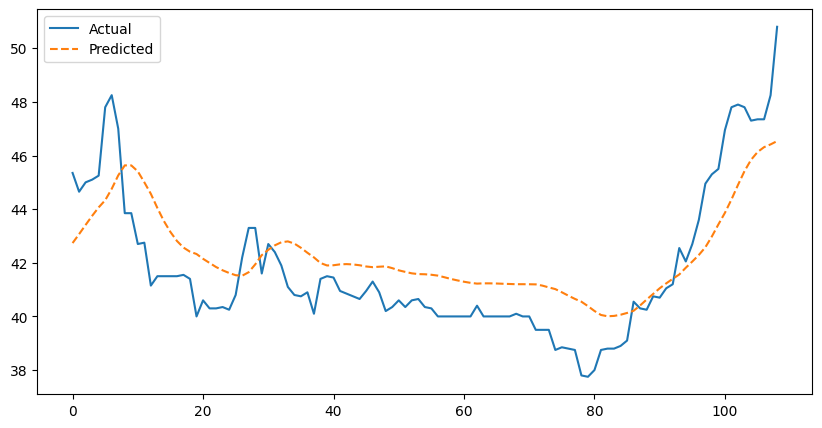

Dự đoán 7 ngày tiếp theo: [46.537964 46.524822 46.436153 46.30157  46.152534 46.00703  45.869965]


In [18]:
hyperparams = {
    "hidden_size": 64,
    "num_layers": 2,
    "epochs": 50,
    "lr": 0.001
}
X_train, y_train, X_test, y_test, scaler = prepare_data(df_vhm)
model, y_pred = train_model(X_train, y_train, X_test, y_test, 1, hyperparams["hidden_size"], hyperparams["num_layers"], hyperparams["epochs"], hyperparams["lr"])
evaluate_model(y_test, y_pred, scaler)
forecast_next_days(model, X_test[-1], scaler)

Epoch [10/50], Loss: 0.057419
Epoch [20/50], Loss: 0.043351
Epoch [30/50], Loss: 0.031237
Epoch [40/50], Loss: 0.013598
Epoch [50/50], Loss: 0.001948
MAE: 2.6245
MSE: 11.9552
RMSE: 3.4576
R2 Score: 0.7643


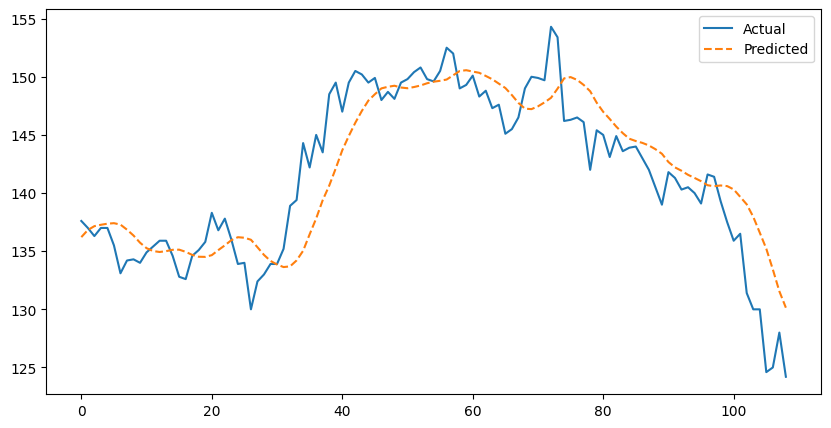

Dự đoán 7 ngày tiếp theo: [130.14131 129.37726 128.96921 128.74928 128.57426 128.5672  128.58566]


In [17]:
hyperparams = {
    "hidden_size": 64,
    "num_layers": 2,
    "epochs": 50,
    "lr": 0.001
}
X_train, y_train, X_test, y_test, scaler = prepare_data(df_fpt)
model, y_pred = train_model(X_train, y_train, X_test, y_test, 1, hyperparams["hidden_size"], hyperparams["num_layers"], hyperparams["epochs"], hyperparams["lr"])
evaluate_model(y_test, y_pred, scaler)
forecast_next_days(model, X_test[-1], scaler)

Epoch [10/50], Loss: 0.052861
Epoch [20/50], Loss: 0.043663
Epoch [30/50], Loss: 0.039974
Epoch [40/50], Loss: 0.027892
Epoch [50/50], Loss: 0.017576
MAE: 0.5932
MSE: 0.5091
RMSE: 0.7135
R2 Score: -0.1328


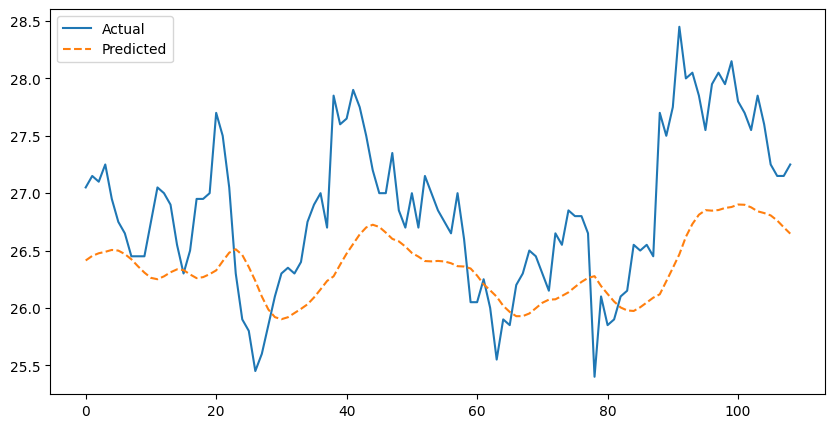

Dự đoán 7 ngày tiếp theo: [26.647207 26.566137 26.478092 26.395798 26.32167  26.256973 26.199379]


In [19]:
hyperparams = {
    "hidden_size": 64,
    "num_layers": 2,
    "epochs": 50,
    "lr": 0.001
}
X_train, y_train, X_test, y_test, scaler = prepare_data(df_hpg)
model, y_pred = train_model(X_train, y_train, X_test, y_test, 1, hyperparams["hidden_size"], hyperparams["num_layers"], hyperparams["epochs"], hyperparams["lr"])
evaluate_model(y_test, y_pred, scaler)
forecast_next_days(model, X_test[-1], scaler)

Epoch [10/50], Loss: 0.034153
Epoch [20/50], Loss: 0.026175
Epoch [30/50], Loss: 0.024077
Epoch [40/50], Loss: 0.018697
Epoch [50/50], Loss: 0.012309
MAE: 0.9772
MSE: 1.4247
RMSE: 1.1936
R2 Score: 0.2835


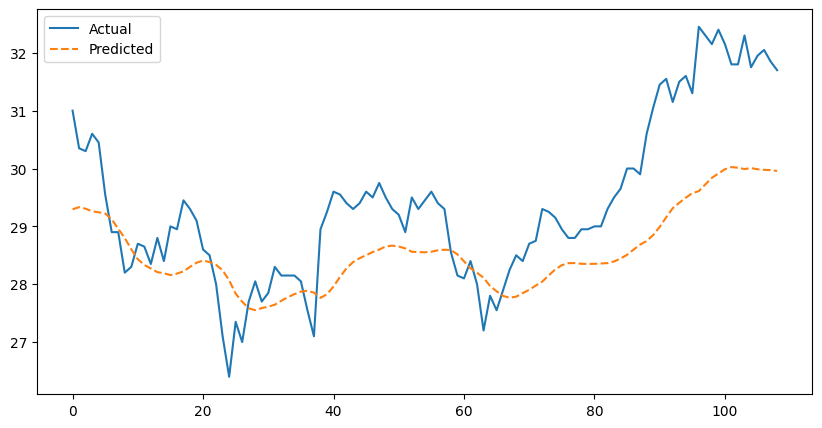

Dự đoán 7 ngày tiếp theo: [29.957891 29.77659  29.550917 29.327929 29.12247  28.93612  28.76624 ]


In [20]:
hyperparams = {
    "hidden_size": 64,
    "num_layers": 2,
    "epochs": 50,
    "lr": 0.001
}
X_train, y_train, X_test, y_test, scaler = prepare_data(df_hcm)
model, y_pred = train_model(X_train, y_train, X_test, y_test, 1, hyperparams["hidden_size"], hyperparams["num_layers"], hyperparams["epochs"], hyperparams["lr"])
evaluate_model(y_test, y_pred, scaler)
forecast_next_days(model, X_test[-1], scaler)